In [1]:
!pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.0/252.0 kB 5.2 MB/s eta 0:00:00


In [2]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt
from matplotlib.pyplot import plot
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("/content/data.csv")
genre_data = pd.read_csv('/content/data_by_genres.csv')
year_data = pd.read_csv('/content/data_by_year.csv')
artist_data = pd.read_csv('/content/data_by_artist.csv')

In [7]:
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0.0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10.0,0.665,-20.096,1.0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4.0,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0.0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7.0,0.160,-12.441,1.0,Clancy Lowered the Boom,5.0,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0.0,1o6I8BglA6ylDMrIELygv1,0.913000,3.0,0.101,-14.850,1.0,Gati Bali,5.0,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0.0,3ftBPsC5vPBKxYSee08FDH,0.000028,5.0,0.381,-9.316,1.0,Danny Boy,3.0,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0.0,4d6HGyGT8e121BsdKmw9v6,0.000002,3.0,0.229,-10.096,1.0,When Irish Eyes Are Smiling,2.0,1921,0.0380,101.665


In [8]:
data.shape

(144487, 19)

In [ ]:
genre_data.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [9]:
genre_data.shape

(2973, 14)

In [10]:
year_data.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [11]:
year_data.shape

(100, 14)

In [12]:
artist_data.head()

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5


In [13]:
artist_data.shape

(28680, 15)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144487 entries, 0 to 144486
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           144487 non-null  float64
 1   year              144487 non-null  int64  
 2   acousticness      144487 non-null  float64
 3   artists           144487 non-null  object 
 4   danceability      144487 non-null  float64
 5   duration_ms       144487 non-null  int64  
 6   energy            144487 non-null  float64
 7   explicit          144486 non-null  float64
 8   id                144486 non-null  object 
 9   instrumentalness  144486 non-null  float64
 10  key               144486 non-null  float64
 11  liveness          144486 non-null  float64
 12  loudness          144486 non-null  float64
 13  mode              144486 non-null  float64
 14  name              144486 non-null  object 
 15  popularity        144486 non-null  float64
 16  release_date      14

In [15]:
year_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


In [16]:
artist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              28680 non-null  int64  
 1   count             28680 non-null  int64  
 2   acousticness      28680 non-null  float64
 3   artists           28680 non-null  object 
 4   danceability      28680 non-null  float64
 5   duration_ms       28680 non-null  float64
 6   energy            28680 non-null  float64
 7   instrumentalness  28680 non-null  float64
 8   liveness          28680 non-null  float64
 9   loudness          28680 non-null  float64
 10  speechiness       28680 non-null  float64
 11  tempo             28680 non-null  float64
 12  valence           28680 non-null  float64
 13  popularity        28680 non-null  float64
 14  key               28680 non-null  int64  
dtypes: float64(11), int64(3), object(1)
memory usage: 3.3+ MB


In [17]:
genre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [18]:
data['decade'] = data['year'].apply(lambda year : f'{(year//10)*10}s' )

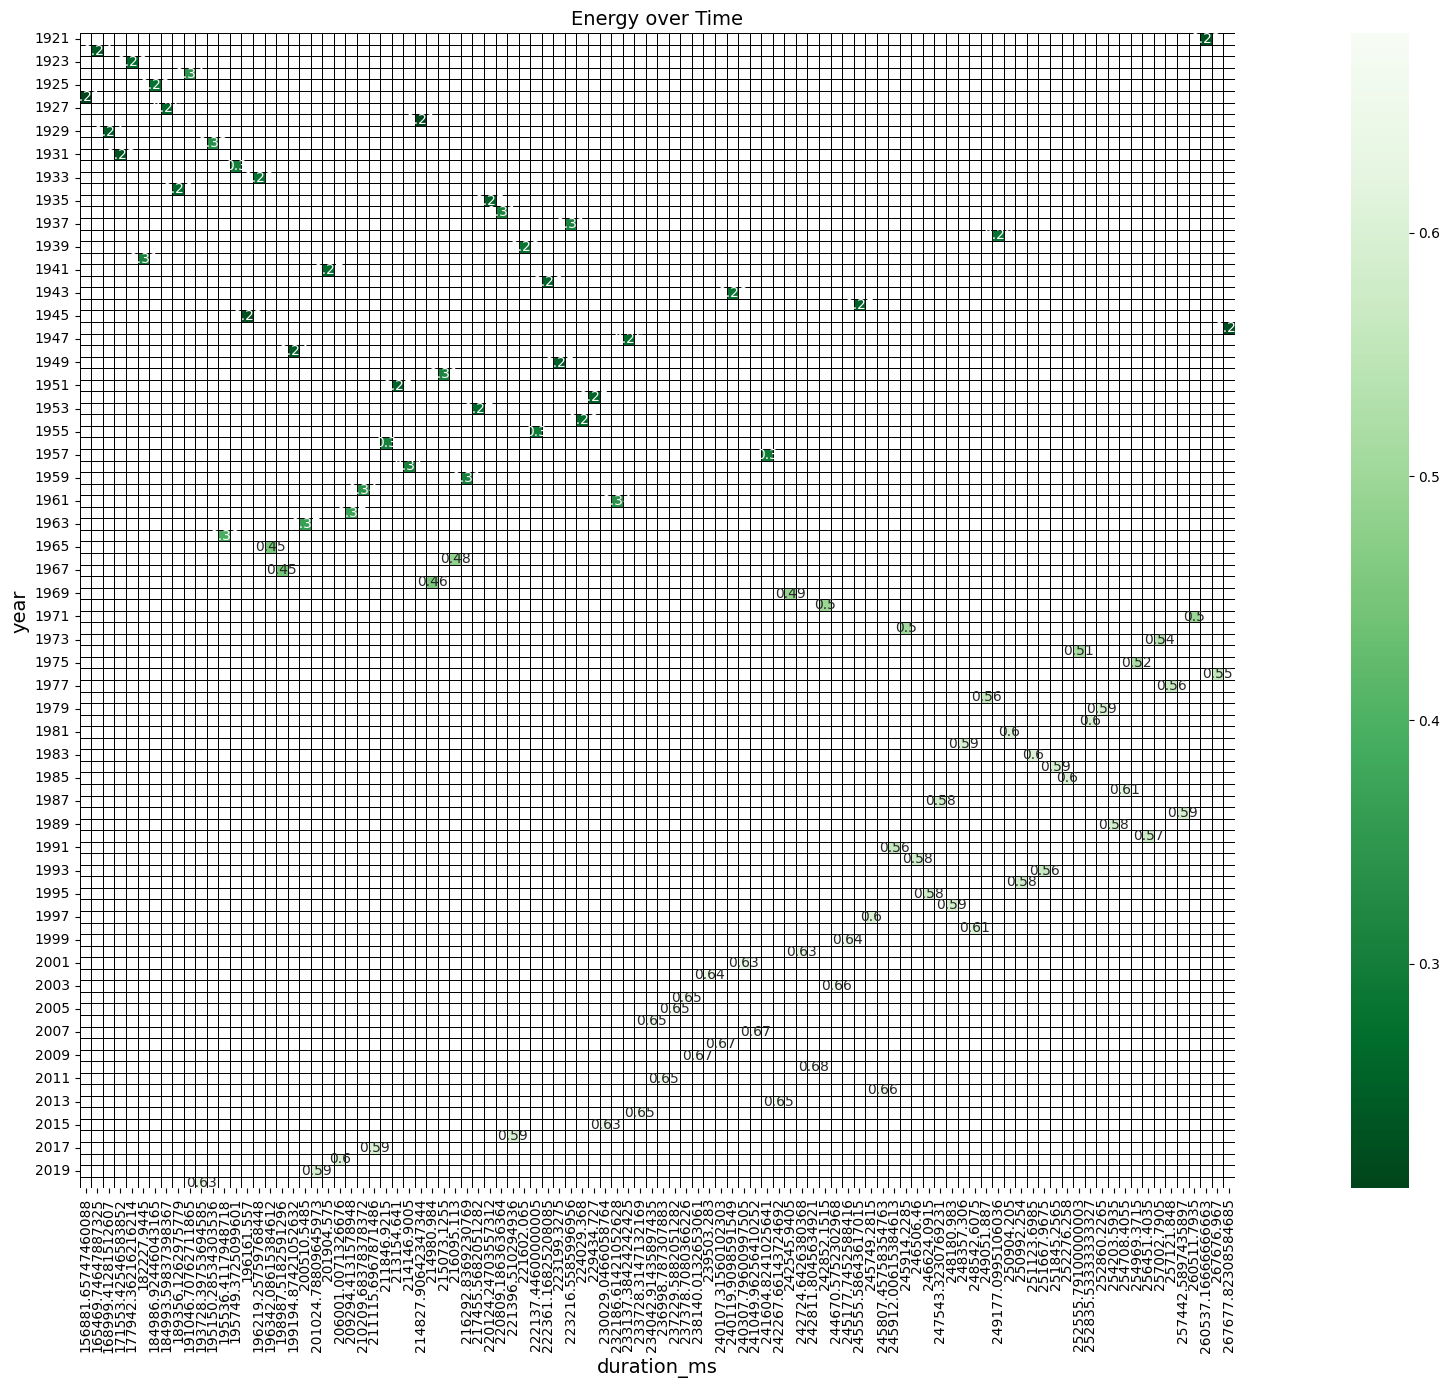

In [19]:
pivot_table = year_data.pivot_table(index='year', columns='duration_ms', values='energy')

plt.figure(figsize=(30, 15))  # Adjusted figure size to a more reasonable height
plt.xlabel('Year', size=14)
plt.ylabel('Duration (ms)', size=14)
plt.title('Energy over Time', size=14)

sns.heatmap(pivot_table, annot=True, linewidths=.4, linecolor='black', square=True, cmap='Greens_r', cbar=True)

plt.show()

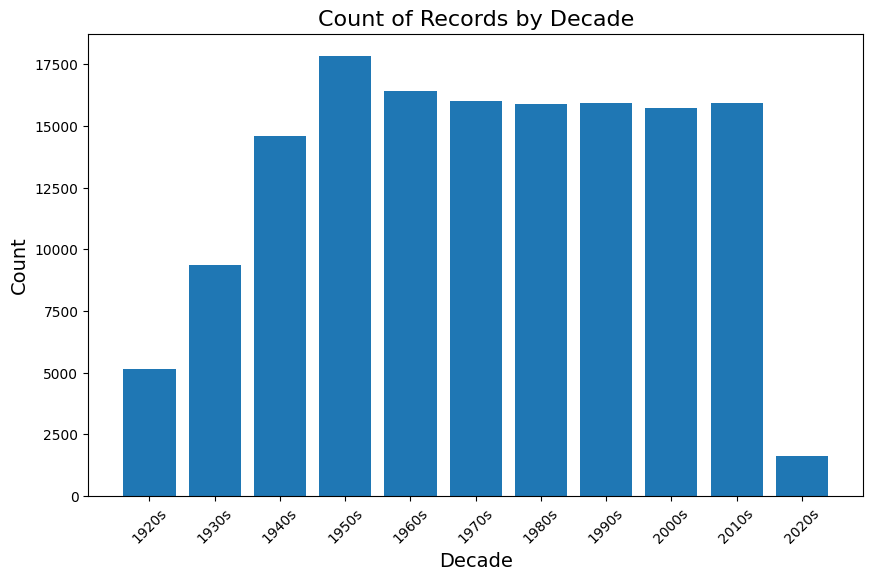

In [20]:
decade_counts = data['decade'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(decade_counts.index, decade_counts.values)
plt.xlabel('Decade', size=14)
plt.ylabel('Count', size=14)
plt.title('Count of Records by Decade', size=16)
plt.xticks(rotation=45)
plt.show()

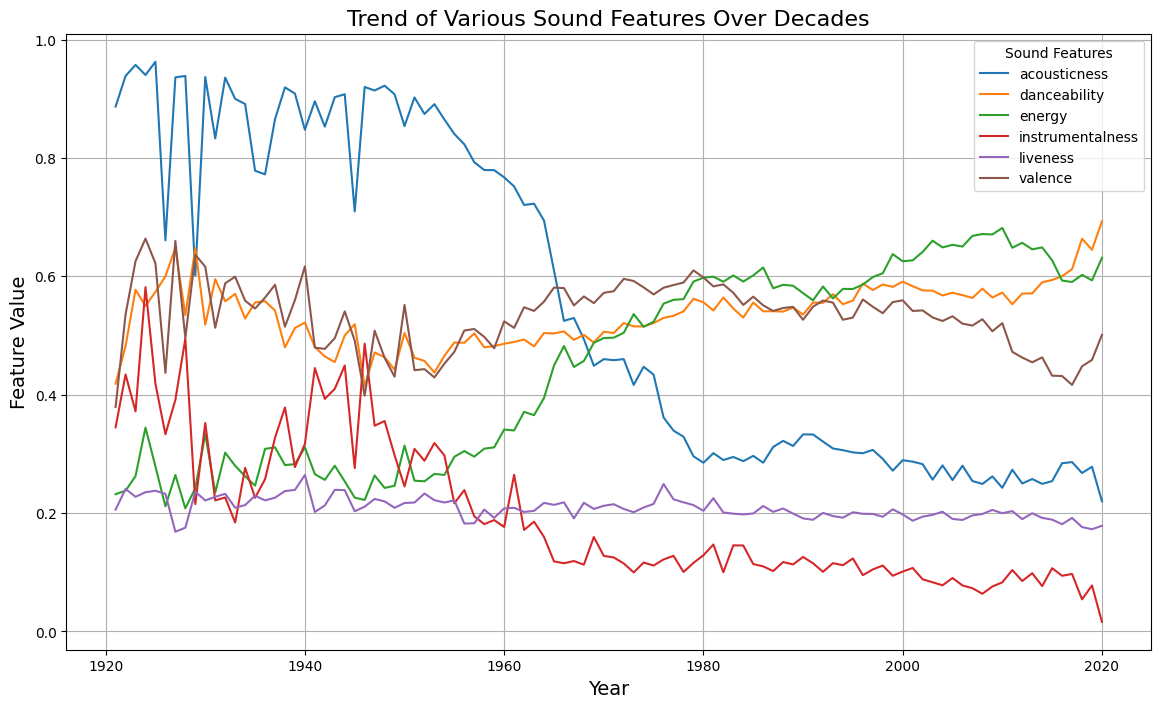

In [21]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']

plt.figure(figsize=(14, 8))

for feature in sound_features:
    plt.plot(year_data['year'], year_data[feature], label=feature)

plt.xlabel('Year', size=14)
plt.ylabel('Feature Value', size=14)
plt.title('Trend of Various Sound Features Over Decades', size=16)
plt.legend(title='Sound Features')
plt.grid(True)
plt.show()

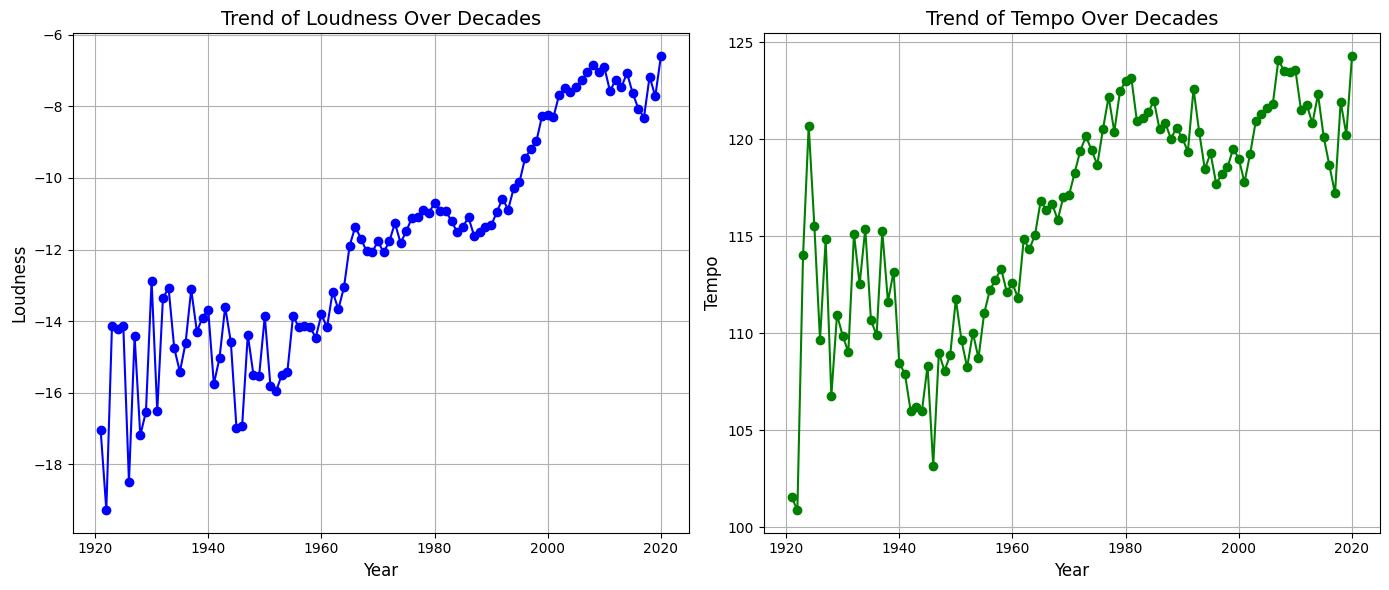

In [22]:
plt.figure(figsize=(14, 6))

# Plot for loudness trend
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(year_data['year'], year_data['loudness'], color='blue', marker='o')
plt.xlabel('Year', size=12)
plt.ylabel('Loudness', size=12)
plt.title('Trend of Loudness Over Decades', size=14)
plt.grid(True)

# Plot for tempo trend
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(year_data['year'], year_data['tempo'], color='green', marker='o')
plt.xlabel('Year', size=12)
plt.ylabel('Tempo', size=12)
plt.title('Trend of Tempo Over Decades', size=14)
plt.grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

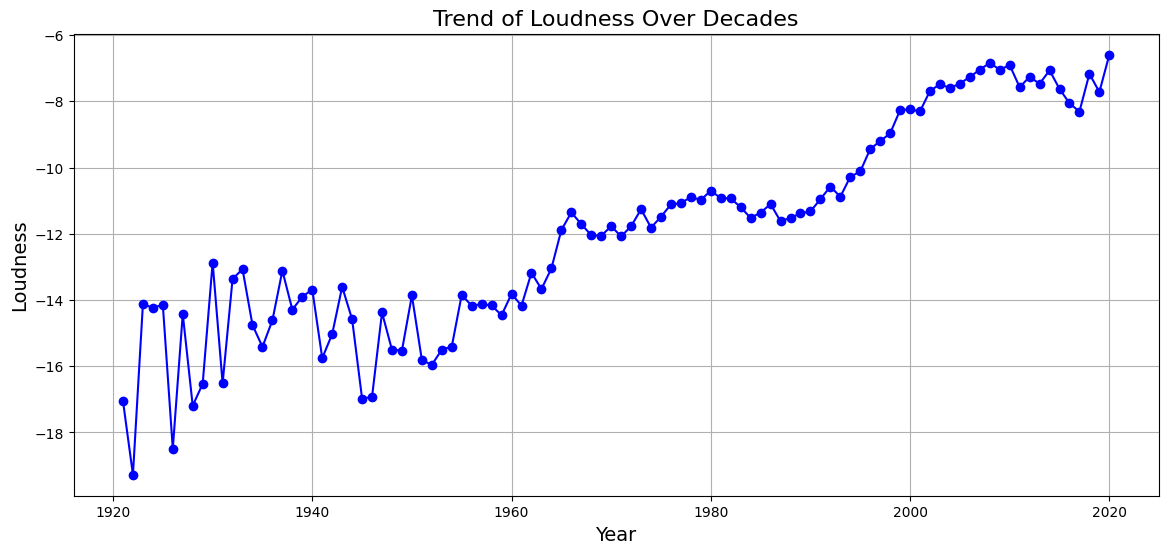

In [23]:
# Assuming year_data is a DataFrame and it has 'year' and 'loudness' columns
plt.figure(figsize=(14, 6))

plt.plot(year_data['year'], year_data['loudness'], color='blue', marker='o')
plt.xlabel('Year', size=14)
plt.ylabel('Loudness', size=14)
plt.title('Trend of Loudness Over Decades', size=16)
plt.grid(True)

plt.show()

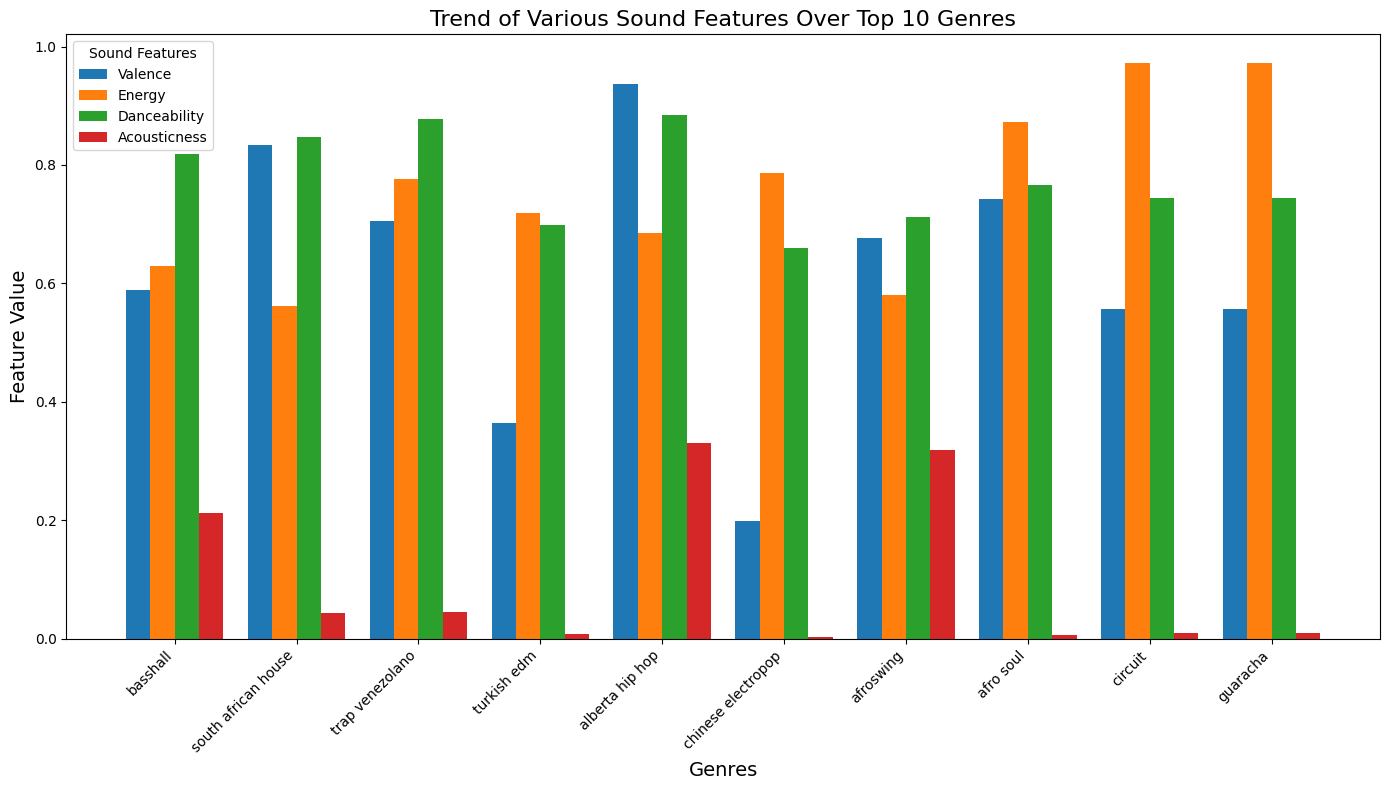

In [24]:
# Assuming genre_data is a DataFrame and it has 'genres', 'popularity', 'valence', 'energy', 'danceability', and 'acousticness' columns
top10_genres = genre_data.nlargest(10, 'popularity')

# Setting the positions and width for the bars
bar_width = 0.2
indices = np.arange(len(top10_genres))

plt.figure(figsize=(14, 8))

# Plotting the bars for each sound feature
plt.bar(indices, top10_genres['valence'], bar_width, label='Valence')
plt.bar(indices + bar_width, top10_genres['energy'], bar_width, label='Energy')
plt.bar(indices + 2 * bar_width, top10_genres['danceability'], bar_width, label='Danceability')
plt.bar(indices + 3 * bar_width, top10_genres['acousticness'], bar_width, label='Acousticness')

plt.xlabel('Genres', size=14)
plt.ylabel('Feature Value', size=14)
plt.title('Trend of Various Sound Features Over Top 10 Genres', size=16)
plt.xticks(indices + 1.5 * bar_width, top10_genres['genres'], rotation=45, ha='right')
plt.legend(title='Sound Features')
plt.tight_layout()
plt.show()

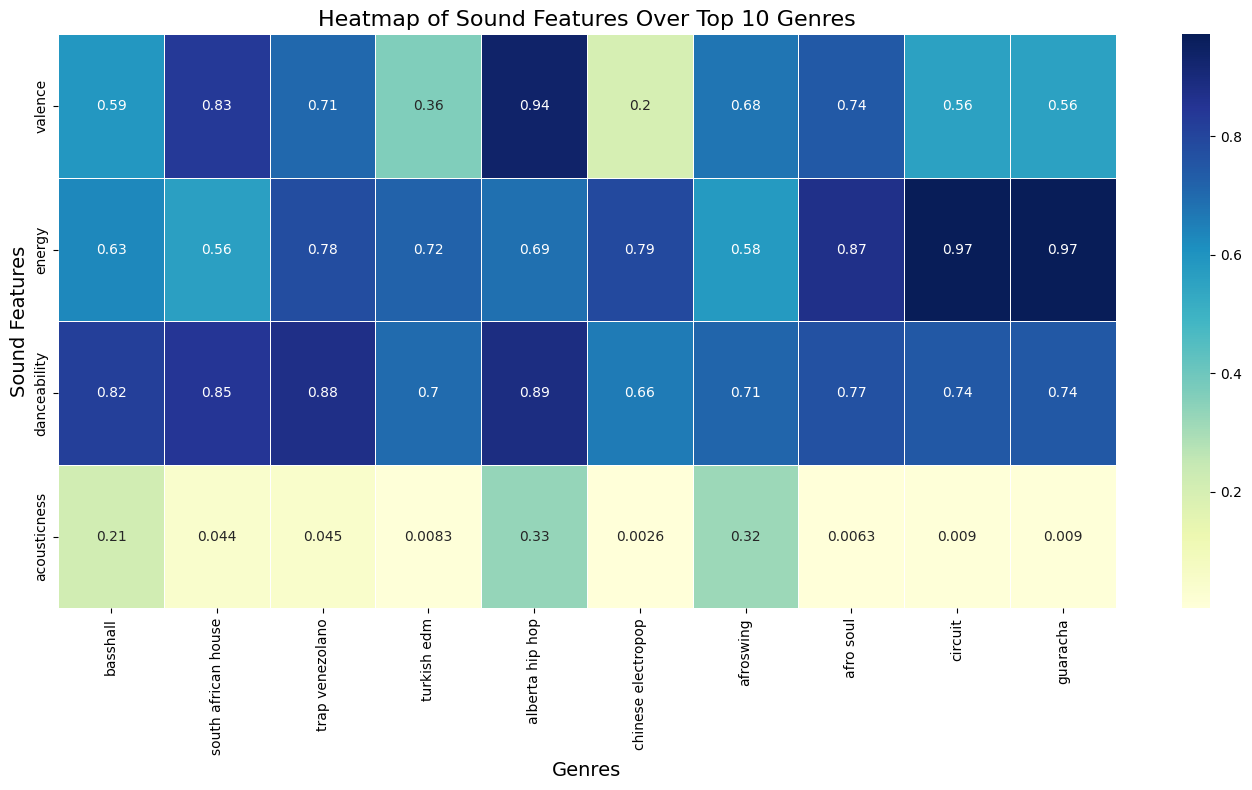

In [25]:
plt.figure(figsize=(14, 8))

# Preparing data for heatmap
heatmap_data = top10_genres.set_index('genres')[['valence', 'energy', 'danceability', 'acousticness']].T

# Creating the heatmap
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', linewidths=.5)

plt.xlabel('Genres', size=14)
plt.ylabel('Sound Features', size=14)
plt.title('Heatmap of Sound Features Over Top 10 Genres', size=16)
plt.tight_layout()
plt.show()

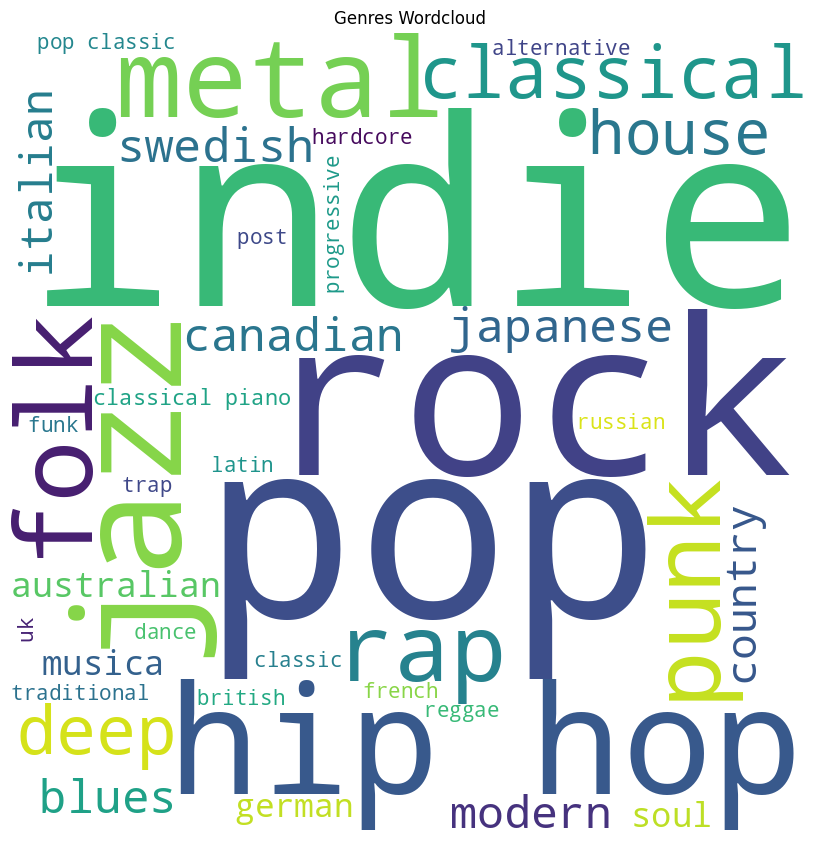

In [26]:
from wordcloud import WordCloud,STOPWORDS

stopwords = set(STOPWORDS)
comment_words = " ".join(genre_data['genres'])+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                max_words=40,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Genres Wordcloud")
plt.show()


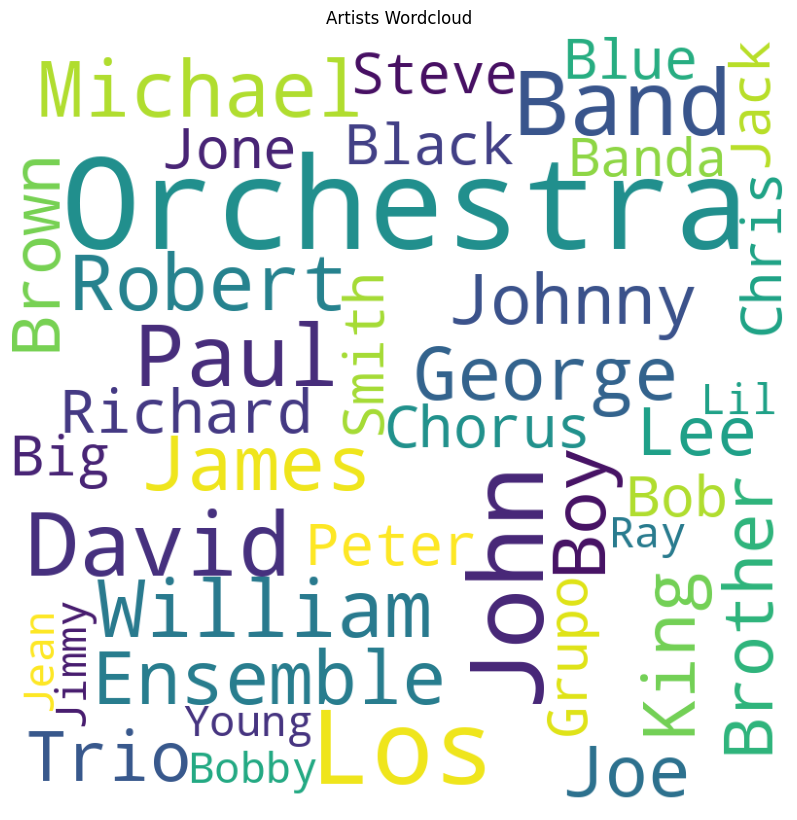

In [27]:
stopwords = set(STOPWORDS)
comment_words = " ".join(artist_data['artists'])+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_word_length=3,
                max_words=40,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Artists Wordcloud")
plt.tight_layout(pad = 0)
plt.show()


In [28]:
top10_popular_artists = artist_data.nlargest(10, 'popularity')
top10_most_song_produced_artists = artist_data.nlargest(10, 'count')

In [29]:
from IPython.display import display

print('Top 10 Artists that had most popularity score:')
display(top10_popular_artists[['popularity', 'artists']].sort_values('popularity', ascending=True))

Top 10 Artists that had most popularity score:


,popularity,artists
2343,86.0,Beltito
14378,86.0,Lenny Santos
213,87.0,A7S
7463,88.0,Emilee
23687,88.0,Surf Mesa
28263,88.0,salem ilese
11764,89.0,Jerry Di
15070,90.0,Los Legendarios
14354,92.0,Lele Pons
20966,93.0,Ritt Momney


In [30]:
from IPython.display import display

print('Top 10 Artists that produced most songs:')
display(top10_most_song_produced_artists[['count','artists']].sort_values('count',ascending=True))


Top 10 Artists that produced most songs:


,count,artists
7426,1023,Elvis Presley
12378,1061,Johnny Cash
2707,1103,Billie Holiday
1682,1146,Arturo Toscanini
27109,1200,Vladimir Horowitz
10714,1256,Ignacio Corsini
8434,1459,Frank Sinatra
28560,2136,Эрих Мария Ремарк
28561,2422,Эрнест Хемингуэй
8367,3169,Francisco Canaro


In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select numeric columns for clustering
X = genre_data.select_dtypes(include=['float64', 'int64'])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=12)
genre_data['cluster'] = kmeans.fit_predict(X_scaled)

# Print cluster centers if needed
print("Cluster Centers:")
print(kmeans.cluster_centers_)


Cluster Centers:
[[ 0.44748433 -0.38931839  0.74599062 -0.18384521  0.39368898 -0.52425867
  -0.1310992   0.45035989  0.07373673  0.06201916  0.79555296  0.41805975
   0.61520926]
 [ 0.21311739  1.30792271 -0.1108689  -0.43492581 -0.93574545  0.11863048
   0.09967391 -0.4912042  -0.11110099 -0.38028081  0.37538509 -1.57111709
  -0.02122273]
 [ 0.40981299  0.54014068 -0.04169878 -0.16929534 -0.59113249 -0.4699258
  -0.28179219 -0.18499606 -0.36156126 -0.14919546 -0.19277626  0.2690802
   0.01901285]
 [ 0.22041983 -0.68008349  0.03277821  0.74388266  0.36718647  1.64461647
  -0.13730577  0.070882   -0.26713317  0.03317092 -0.61049165 -0.33256016
  -0.24735011]
 [-0.28402461  0.93710526  0.47609522  0.53015543 -0.86478314 -0.70132778
   1.86991122 -1.24531709  7.98430678 -0.90648018 -0.12454613 -1.53387673
   0.58508777]
 [ 0.44748433 -0.95247557 -0.62470603 -0.08614432  1.04293706 -0.25585242
   0.24870041  0.71045601 -0.02290503  0.82507499 -0.32066918  0.23819729
   0.48556239]
 [ 0.10

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.009s...
[t-SNE] Computed neighbors for 2973 samples in 0.514s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.777516
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.106300
[t-SNE] KL divergence after 1000 iterations: 1.393018


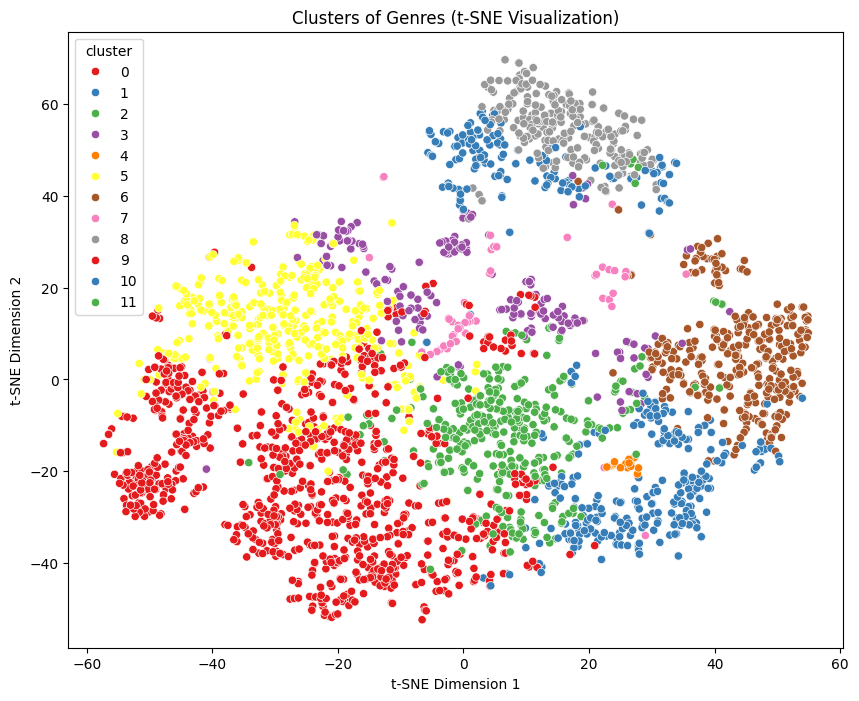

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# Assuming X_scaled is already defined from the previous code snippet
tsne = TSNE(n_components=2, verbose=1)
genre_embedding = tsne.fit_transform(X_scaled)

# Create a DataFrame for embedding
embedding_df = pd.DataFrame(data=genre_embedding, columns=['x', 'y'])
embedding_df['genres'] = genre_data['genres']
embedding_df['cluster'] = genre_data['cluster']

# Plot the clusters using seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(data=embedding_df, x='x', y='y', hue='cluster', palette='Set1', legend='full')
plt.title('Clusters of Genres (t-SNE Visualization)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [36]:
# Select numeric columns for clustering
X = data.select_dtypes(include=['float64', 'int64'])

# Drop rows with missing values
X = X.dropna()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=25, verbose=False)
song_cluster_labels = kmeans.fit_predict(X_scaled)

# Assign cluster labels to the DataFrame
# Drop corresponding rows from the original dataframe
data_cleaned = data.dropna()
data_cleaned['cluster_label'] = song_cluster_labels

print(data_cleaned.head())

   valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211       0.0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341       0.0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166       0.0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309       0.0  3ftBPsC5vPBKxYSee08FDH      

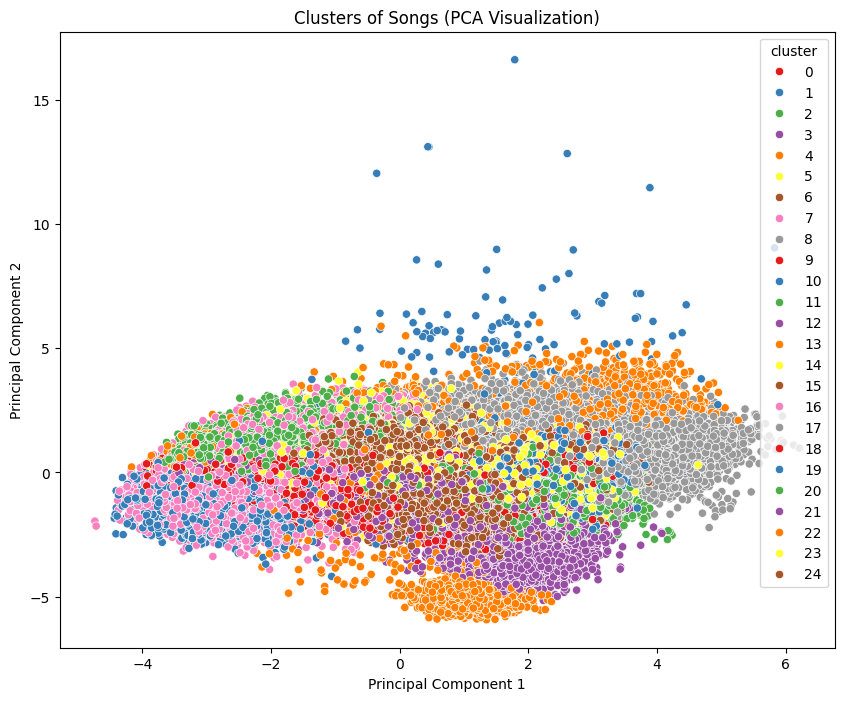

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define number_cols which are the numeric columns
number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
               'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']

# Select numeric columns for clustering
X = data[number_cols]

# Handle missing values by imputing with the mean value of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=25, verbose=False)
song_cluster_labels = kmeans.fit_predict(X_scaled)

# Assign cluster labels to the DataFrame
data['cluster_label'] = song_cluster_labels

# Apply PCA to reduce the dimensions to 2
pca = PCA(n_components=2)
song_embedding = pca.fit_transform(X_scaled)

# Create a DataFrame for the embedding
embedding_df = pd.DataFrame(data=song_embedding, columns=['x', 'y'])
embedding_df['title'] = data['name']
embedding_df['cluster'] = data['cluster_label']

# Plot the clusters using seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(data=embedding_df, x='x', y='y', hue='cluster', palette='Set1', legend='full')
plt.title('Clusters of Songs (PCA Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [44]:
#import spotipy
#from spotipy.oauth2 import SpotifyClientCredentials

# Set your Spotify API credentials
#CLIENT_ID = "your_client_id"
#CLIENT_SECRET = "your_client_secret"

# Authenticate with the Spotify API
#auth_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
#sp = spotipy.Spotify(auth_manager=auth_manager)

# Now you can use the `sp` object to make API requests


In [45]:
def find_song(name, year):
    song_data = defaultdict()
    results = sp.search(q= 'track: {} year: {}'.format(name,year), limit=1)
    if results['tracks']['items'] == []:
        return None

    results = results['tracks']['items'][0]
    track_id = results['id']
    audio_features = sp.audio_features(track_id)[0]

    song_data['name'] = [name]
    song_data['year'] = [year]
    song_data['explicit'] = [int(results['explicit'])]
    song_data['duration_ms'] = [results['duration_ms']]
    song_data['popularity'] = [results['popularity']]

    for key, value in audio_features.items():
        song_data[key] = value

    return pd.DataFrame(song_data)


In [46]:
number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
               'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']


In [47]:
def get_song_data(song, spotify_data):
    try:
        # Check if song details are available in the local dataset
        song_data = spotify_data[(spotify_data['name'] == song['name'])
                                 & (spotify_data['year'] == song['year'])].iloc[0]
        print('Fetching song information from local dataset')
        return song_data

    except IndexError:
        # If song details are not available locally, fetch from Spotify dataset
        print('Fetching song information from Spotify dataset')
        return find_song(song['name'], song['year'])


In [48]:
def get_mean_vector(song_list, spotify_data):
    song_vectors = []

    # Iterate over each song in the song list
    for song in song_list:
        # Get song data
        song_data = get_song_data(song, spotify_data)

        # Check if song data is available
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in the database'.format(song['name']))
            continue

        # Extract numerical features of the song data
        song_vector = song_data[number_cols].values
        song_vectors.append(song_vector)

    # Convert song_vectors list to a numpy array
    song_matrix = np.array(song_vectors)

    # Calculate the mean vector of all numerical features
    mean_vector = np.mean(song_matrix, axis=0)

    return mean_vector

In [49]:
from collections import defaultdict

def flatten_dict_list(dict_list):
    flattened_dict = defaultdict(list)

    # Iterate over the keys of the first dictionary in the list
    for key in dict_list[0].keys():
        flattened_dict[key] = [dic[key] for dic in dict_list]  # Create a list of values for each key

    return flattened_dict


In [50]:
def recommend_songs( song_list, spotify_data, n_songs=10):

    metadata_cols = ['name', 'year', 'artists']
    song_dict = flatten_dict_list(song_list)

    song_center = get_mean_vector(song_list, spotify_data)
    #print(f'song_center {song_center}')
    scaler = song_cluster_pipeline.steps[0][1] # StandardScalar()
    scaled_data = scaler.transform(spotify_data[number_cols])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    distances = cdist(scaled_song_center, scaled_data, 'cosine')
    #print(f'distances {distances}')
    index = list(np.argsort(distances)[:, :n_songs][0])

    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['name'].isin(song_dict['name'])]
    return rec_songs[metadata_cols].to_dict(orient='records')

In [51]:
from scipy.spatial.distance import cdist

def recommend_songs(song_list, spotify_data, n_songs=10):
    metadata_cols = ['name', 'year', 'artists']
    song_dict = flatten_dict_list(song_list)

    # Get the mean vector of the input songs
    song_center = get_mean_vector(song_list, spotify_data)

    # Scale the numerical features of the Spotify data
    scaled_data = scaler.transform(spotify_data[number_cols])

    # Scale the mean vector of the input songs
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))

    # Calculate the cosine distances between the scaled mean vector and all scaled data points
    distances = cdist(scaled_song_center, scaled_data, 'cosine')

    # Find the indices of the nearest songs
    index = np.argsort(distances)[:, :n_songs][0]

    # Retrieve the recommended songs from the Spotify data
    rec_songs = spotify_data.iloc[index]

    # Filter out songs that are already in the input song list
    rec_songs = rec_songs[~rec_songs['name'].isin(song_dict['name'])]

    # Return the recommended songs with selected metadata columns
    return rec_songs[metadata_cols].to_dict(orient='records')



In [55]:
recommend_songs([{'name': 'Power Is Power', 'year': 1921}],  data)

Fetching song information from local dataset


[{'name': 'Where Did You Sleep Last Night',
  'year': 1937,
  'artists': "['C-BONY', 'Guy C-bony', 'guy sibony']"},
 {'name': 'Mickey & Mallorie', 'year': 1927, 'artists': "['Numba 9']"},
 {'name': 'Sky Depth', 'year': 1950, 'artists': "['Sundef']"},
 {'name': 'Higher Power Part Duece', 'year': 1927, 'artists': "['Numba 9']"},
 {'name': 'Trash Bags of That Sour', 'year': 1927, 'artists': "['Numba 9']"},
 {'name': 'Bitch Down (Freestyle)', 'year': 1951, 'artists': "['Ouija Macc']"},
 {'name': 'Smooth as Sade', 'year': 1927, 'artists': "['Numba 9']"},
 {'name': 'Dreaming From The Waist', 'year': 1975, 'artists': "['The Who']"},
 {'name': 'From the Bottom',
  'year': 1930,
  'artists': "['Shorty Bralik', 'ParkPlace Swagg', '2Baba']"}]

In [56]:
recommend_songs([{'name': 'Fix You', 'year':2005}],  data)

Fetching song information from local dataset


[{'name': 'Have I Told You Lately',
  'year': 1989,
  'artists': "['Van Morrison']"},
 {'name': 'Fine Line', 'year': 2019, 'artists': "['Harry Styles']"},
 {'name': 'Goodbye', 'year': 1993, 'artists': "['Air Supply']"},
 {'name': 'Thank You For Loving Me', 'year': 2000, 'artists': "['Bon Jovi']"},
 {'name': 'Stop Crying Your Heart Out', 'year': 2002, 'artists': "['Oasis']"},
 {'name': 'Ashes of Eden', 'year': 2015, 'artists': "['Breaking Benjamin']"},
 {'name': 'Awake My Soul', 'year': 2009, 'artists': "['Mumford & Sons']"},
 {'name': 'Go the Distance', 'year': 1997, 'artists': "['Michael Bolton']"},
 {'name': 'A Whole New World (End Title)',
  'year': 2019,
  'artists': "['ZAYN', 'Zhavia Ward']"}]

In [60]:
recommend_songs([{'name': 'I Will Follow', 'year':2010},{'name': 'Come As You Are', 'year':1991}],  data)

Fetching song information from local dataset
Fetching song information from local dataset


[{'name': 'Face Down',
  'year': 2006,
  'artists': "['The Red Jumpsuit Apparatus']"},
 {'name': 'BURN IT DOWN', 'year': 2012, 'artists': "['Linkin Park']"},
 {'name': 'The Last Stand', 'year': 2016, 'artists': "['Sabaton']"},
 {'name': 'In Your Eyes (feat. Kenny G) - Remix',
  'year': 2020,
  'artists': "['The Weeknd', 'Kenny G']"},
 {'name': 'Pray to God (feat. HAIM)',
  'year': 2014,
  'artists': "['Calvin Harris', 'HAIM']"},
 {'name': '空に歌えば', 'year': 2017, 'artists': "['amazarashi']"},
 {'name': 'Stranded', 'year': 2016, 'artists': "['Gojira']"},
 {'name': 'Tequila - R3HAB Remix',
  'year': 2018,
  'artists': "['Dan + Shay', 'R3HAB']"},
 {'name': 'Charlie', 'year': 2006, 'artists': "['Red Hot Chili Peppers']"},
 {'name': 'War of Change',
  'year': 2012,
  'artists': "['Thousand Foot Krutch']"}]